In [375]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

# Assignment 3 - Basic Predictions and Regression

## Questions

### Part 1 - Election Prediction

Suppose you are looking at an election in a fictional province. There are 7 total elctoral districts, and the winner in each district is determined by a first-past-the-post system (what we have in Canada - the most votes wins, regardless of share). There are two parties - the Purples and the Yellows. Whoever controls the most seats will be the ruling party - so in our 2 party scenario, the party who wins 4 or more of the districts will govern. There is an election every year, they love voting. 

Recent polling indicating the expected vote share in each district is shown in the "dist_polls" table below. These values are a composite of several polls that the experts have combined and weighted. The "Purple" values show the expected vote share of the Purple party, along with the variance of that expectation and the number of polls that were combined to get that result.  

As well, research has shown that the vote distribution is impacted by voter turnout. In general, the more people vote, the more the vote split shifts towards the Yellow party. We have data on past elections and the results, we expect that the turnout will be in line with the past elections - or more specifically, we have no reason to expect it to differ. This impact is measured in the table in code below - that table shows the voter turnout, in a percentage, as well as the change in the Yellow party's vote share (also in percentage) as compared to the polling averages. For example, if one row showed "52" and ".8", that would mean that voter turnout was 52%, and the Yellow party got .8% higher of a vote share than the polling showed. 

<b>What is the probability that the Purple Party controls the government after the election?</b>

<b>Note:</b> the errors and confidence intervals are not totally trivial. As part of the written answer, offer an evaluation of your confidence in the prediction, and why you think that. This is not a question with one specific error, your estimation will have some expected errors, somewhere. You may not have the tools to calculate it all the way through, that's fine. 

### Question 1 - Your Answer in English

Please fill in (and extend if required) the list here to explain what you did. There are multiple reasonable things you could do to approach this, so please note what you did here. For most people I assume this will be about 3-5 statements - you don't need to explain the internals of things we covered (e.g. if there's a hypothesis test, you don't need to explain how that works), just how you structured your approach to the problem. 

<ul>
<li>
<li>
<li>
<li> <b> What do you think about the error/accuracy:</b>
</ul>

##### Setup Poll Data

The dataframe "dist_polls" contains all of the polls for each seat. Each value is expressed as expected vote share (as a ratio) for the <b>Purple</b> party. The Yellow party can be safely assumed to get the rest of the votes. 

In [376]:
# Please don't edit this part. 
# Setup polling data. 
districts = [1,2,3,4,5,6,7]
dist_polls = pd.DataFrame(districts, columns={"district"})

dist_polls["Poll_1"] = [.55, .49, .51, .6, .41, .46, .54]
dist_polls["Poll_2"] = [.53, .51, .51, .62, .44, .48, .53]
dist_polls["Poll_3"] = [.51, .49, .53, .61, .42, .46, .52]
dist_polls["Poll_4"] = [.47, .48, .51, .54, .45, .45, .51]
dist_polls["Poll_5"] = [.61, .52, .49, .73, .44, .51, .53]
dist_polls["Poll_6"] = [.54, .45, .51, .61, .47, .52, .52]
dist_polls["Poll_7"] = [.55, .47, .5, .56, .47, .46, .56]
dist_polls["Poll_8"] = [.53, .49, .51, .55, .43, .49, .55]
dist_polls["Poll_9"] = [.57, .39, .52, .57, .53, .43, .53]

dist_polls


,district,Poll_1,Poll_2,Poll_3,Poll_4,Poll_5,Poll_6,Poll_7,Poll_8,Poll_9
0,1,0.55,0.53,0.51,0.47,0.61,0.54,0.55,0.53,0.57
1,2,0.49,0.51,0.49,0.48,0.52,0.45,0.47,0.49,0.39
2,3,0.51,0.51,0.53,0.51,0.49,0.51,0.50,0.51,0.52
3,4,0.60,0.62,0.61,0.54,0.73,0.61,0.56,0.55,0.57
4,5,0.41,0.44,0.42,0.45,0.44,0.47,0.47,0.43,0.53
5,6,0.46,0.48,0.46,0.45,0.51,0.52,0.46,0.49,0.43
6,7,0.54,0.53,0.52,0.51,0.53,0.52,0.56,0.55,0.53


In [377]:
dff=dist_polls.drop(["district"],axis=1)
dff


,Poll_1,Poll_2,Poll_3,Poll_4,Poll_5,Poll_6,Poll_7,Poll_8,Poll_9
0,0.55,0.53,0.51,0.47,0.61,0.54,0.55,0.53,0.57
1,0.49,0.51,0.49,0.48,0.52,0.45,0.47,0.49,0.39
2,0.51,0.51,0.53,0.51,0.49,0.51,0.50,0.51,0.52
3,0.60,0.62,0.61,0.54,0.73,0.61,0.56,0.55,0.57
4,0.41,0.44,0.42,0.45,0.44,0.47,0.47,0.43,0.53
5,0.46,0.48,0.46,0.45,0.51,0.52,0.46,0.49,0.43
6,0.54,0.53,0.52,0.51,0.53,0.52,0.56,0.55,0.53


In [378]:
# vote share of purple party in all nine polls in  district 1
df1=dff.iloc[0]
print("Purple pary vote share in 9 polls in district 1:",df1.mean())



Purple pary vote share in 9 polls in district 1: 0.54


In [379]:
df2=dff.iloc[1]
print("Purple pary vote share in 9 polls in district 2  :",round(df2.mean(),2))

Purple pary vote share in 9 polls in district 2  : 0.48


In [380]:
df3=dff.iloc[2]
print("Purple pary vote share in 9 polls in district 3  :",df3.mean())

Purple pary vote share in 9 polls in district 3  : 0.51


In [381]:
df4=dff.iloc[3]
print("Purple pary vote share in 9 polls in district 4  :",round(df4.mean(),2))

Purple pary vote share in 9 polls in district 4  : 0.6


In [382]:
df5=dff.iloc[4]
print("Purple pary vote share in 9 polls in district 5  :",round(df5.mean(),2))

Purple pary vote share in 9 polls in district 5  : 0.45


In [383]:
df6=dff.iloc[5]
print("Purple pary vote share in 9 polls in district 6  :",round(df6.mean(),2))

Purple pary vote share in 9 polls in district 6  : 0.47


In [384]:
df7=dff.iloc[6]
print("Purple pary vote share in 9 polls in district 7 :",round(df7.mean(),2))

Purple pary vote share in 9 polls in district 7 : 0.53


##### Setup Turnout Data

The dataframe "past_vte_table" shows the voter turnout, along with the impact on the votes counted for the <b>Yellow party</b>, all expressed as percentages. For example, if in one row the turnout is .45 and the Yellow_improvement is -.04, that means that 45% of the populace turned out to vote, and the Yellow party got 4% fewer votes than polling indicated. 

In [385]:
# Please don't edit this part. 
# Setup vote data. 
voter_turnout_history = [.53, .51, .48, .55, .54, .59, .49, .57, .56]
past_vote_table = pd.DataFrame(voter_turnout_history, columns={"voter_turn_percentage"})
past_vote_table["Yellow_improvement"] = [.012, .023, -.017, .031, .030, -.004, -.03, .042, .029]
past_vote_table["year"] = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
past_vote_table.head(9)

,voter_turn_percentage,Yellow_improvement,year
0,0.53,0.012,2013
1,0.51,0.023,2014
2,0.48,-0.017,2015
3,0.55,0.031,2016
4,0.54,0.030,2017
5,0.59,-0.004,2018
6,0.49,-0.030,2019
7,0.57,0.042,2020
8,0.56,0.029,2021


## Start Your Work

### Part 1 - Election

Calculation of Percentage share in each district in done above:

In [386]:
# Do some stuff

In [387]:
#c_obj=thinkstats2.Cdf(dist_polls)
#thinkplot.cdf(c_obj)

<AxesSubplot:xlabel='Poll_1', ylabel='Count'>

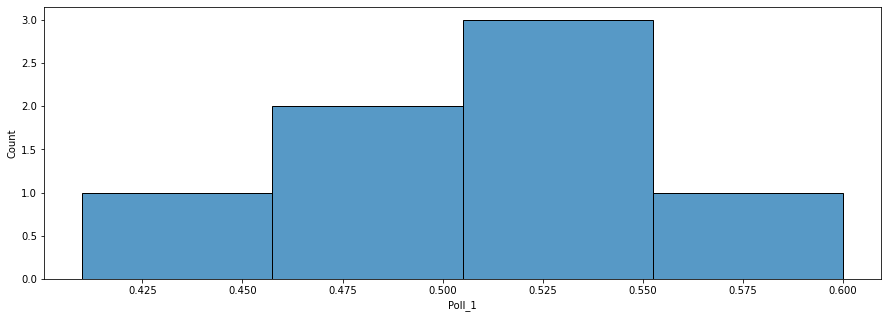

In [388]:

sns.histplot(data=dist_polls, x="Poll_1")

                                DISTRICT-1

In [389]:
df1=dff.iloc[0]
print("Purple pary vote share in all 9 polls in district 1:",df1.mean())

Purple pary vote share in all 9 polls in district 1: 0.54


In [390]:
#How likely is it for someone to vote purple and yellow?
probp = .54
print("Purple Prob:", probp)

proby = .46
print("Yellow Prob :", proby)

Purple Prob: 0.54
Yellow Prob : 0.46


In [391]:
def oneVote(probCalc):
    vote = np.random.binomial(n=1, p=probCalc)
    return vote

In [531]:
oneVote(probp)

0

In [393]:
#Get an arbitrary number of simulated votes
def getSample(voteProb, n=1000):
    vote_list = []
    for i in range(n):
        vote_list.append(oneVote(voteProb))
    return vote_list

In [394]:
#Get a bunch of votes, print the percentage that are purple. 
#Try changing n and see what happens. 
tmp = getSample(probp, 5000)
np.mean(tmp)

0.5394

In [395]:
def getSamples(voteProb, n=1000, samples=100, ciLow=2.5, ciHi=97.5):
    meanList = []
    for i in range(samples):
        meanList.append(np.mean(getSample(voteProb, n)))
    muList = [voteProb] * samples
    cdf = thinkstats2.Cdf(meanList) #Make a CDF of the means of the analytical dist's
    ci = cdf.Percentile(ciLow), cdf.Percentile(ciHi) #5th, 95th percentiles. 
    stderr = mean_squared_error(meanList, muList, squared=False)
    return meanList, stderr, cdf, ci

In [396]:
getSamples(probp, 1000, 5)

([0.531, 0.544, 0.546, 0.54, 0.509],
 0.014791889669680489,
 Cdf([0.509 0.531 0.54  0.544 0.546], [0.2 0.4 0.6 0.8 1. ]),
 (0.509, 0.546))

Error: 0.1617405329532458
Error: 0.051923019942988674
Error: 0.015241719063150324
Error: 0.005139299563170071
Error: 0.0014670933848940845


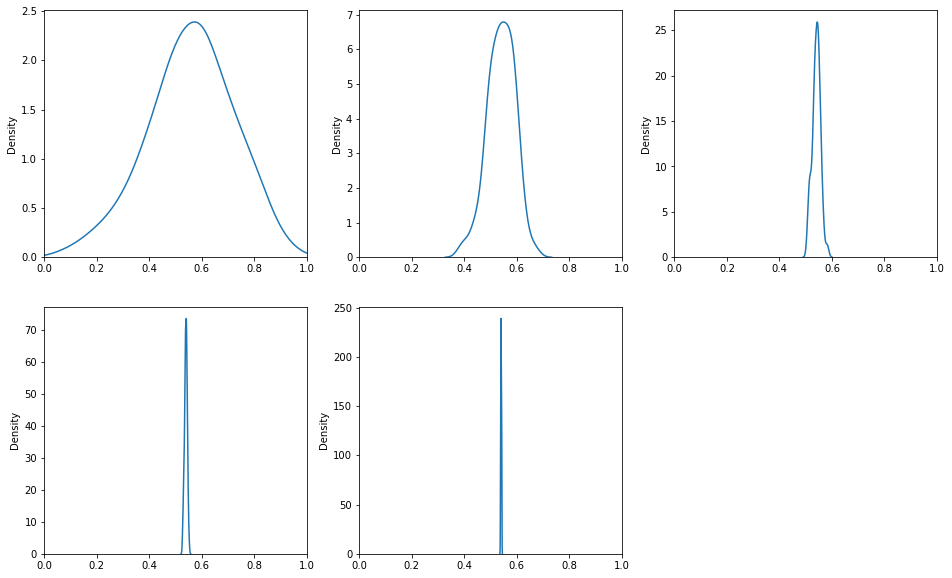

In [397]:
#Print a grid of differnet n values

countHist = 5
nVals = [10,100,1000,10000,100000,1000000]
thinkplot.PrePlot(6,rows=2,cols=3)
samples = 100

for i in range(countHist):
    tmpH, err, cdf, ci = getSamples(probp, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    sns.kdeplot(tmpH).set(xlim=(0,1))
    print("Error:", err)
thinkplot.Config()


Error: 0.149465715132267
Error: 0.05031898250163649
Error: 0.01640396293582742
Error: 0.004531401549189837
Error: 0.0016499469688447527


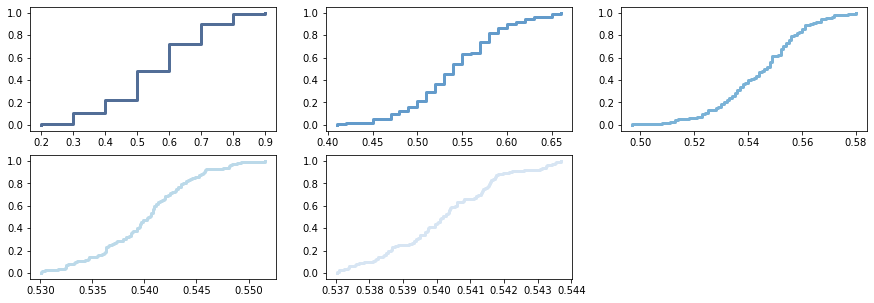

In [398]:
#And the CDFs
from matplotlib.pyplot import xlim


for i in range(countHist):
    tmpH, err, cdf, ci = getSamples(probp, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    thinkplot.Cdf(cdf)
    print("Error:", err)
thinkplot.Config()

0.983


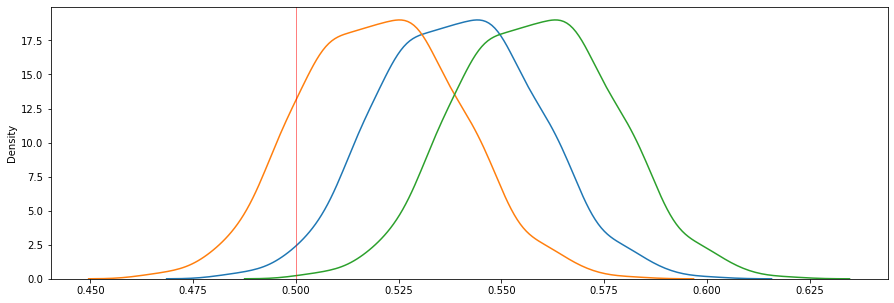

In [399]:
#Run a bunch of trials and count how many purple wins in. 
trials = 1000
means, err, cdfFin, ciFin = getSamples(probp, n=700, samples=trials)
lowest = means - err
highest = means + err
bWins = 0 
for i in range(len(means)):
    if means[i] > .5000:
        bWins = bWins + 1
print(bWins/trials)

sns.kdeplot(means)
sns.kdeplot(lowest)
sns.kdeplot(highest)
thinkplot.axvline(.5, color="red")

Above are multiple executions, with multiple n values. What we should see is that as we get larger and larger n values - the number of 'surveys' taken, we should get closer and closer to a normal curve centered around the expected percentage of votes for purple = 54%.

Fraction of Scenarios where purple wins is 98.3% 
We are 95 percent confident that purple will get between 50.3% and 57.7% percent of the vote


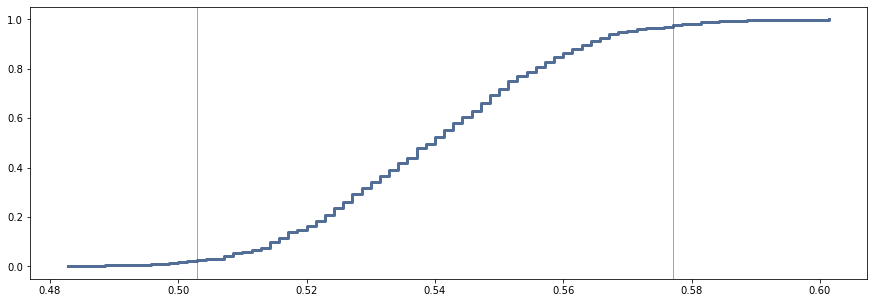

In [400]:
thinkplot.Cdf(cdfFin)
thinkplot.axvline(ciFin[0], color="red")
thinkplot.axvline(ciFin[1], color="red")
print("Fraction of Scenarios where purple wins is %.1f%% " % ((1-cdfFin.Prob(.50))*100))
print("We are 95 percent confident that purple will get between %.1f%% and %.1f%% percent of the vote" % (ciFin[0]*100, ciFin[1]*100))

Prediction-  District1-Winner-Purple Party

                                DISTRICT-2

In [561]:
df2=dff.iloc[1]
print("Purple pary vote share in 9 polls in district 2  :",round(df2.mean(),2))

Purple pary vote share in 9 polls in district 2  : 0.48


In [567]:
#How likely is it for someone to vote purple and yellow?
probp2 = .48
print("Purple Prob:", probp2)

proby2 = .52
print("Yellow Prob :", proby2)

Purple Prob: 0.48
Yellow Prob : 0.52


In [568]:
#Get a bunch of votes, print the percentage that are purple. 
#Try changing n and see what happens. 
tmp3 = getSample(probp2, 5000)
np.mean(tmp3)

0.4828

In [571]:
getSamples(probp2, 1000, 5)

([0.498, 0.506, 0.509, 0.484, 0.483],
 0.019318385025669217,
 Cdf([0.483 0.484 0.498 0.506 0.509], [0.2 0.4 0.6 0.8 1. ]),
 (0.483, 0.509))

Error: 0.15257784898208518
Error: 0.04872371086031934
Error: 0.01601155832515998
Error: 0.00522486363458416
Error: 0.001534011408041019


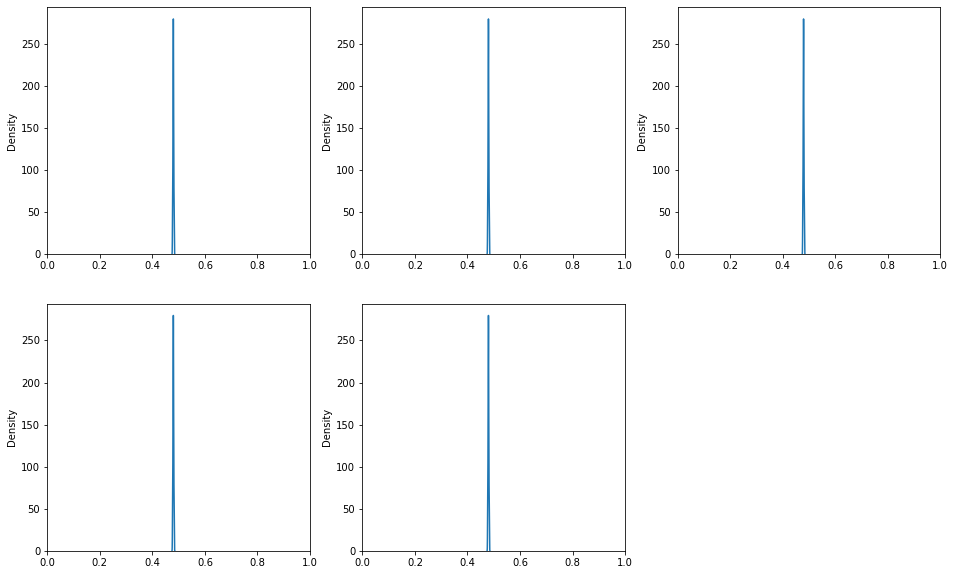

In [575]:
#Print a grid of differnet n values

countHist = 5
nVals = [10,100,1000,10000,100000,1000000]
thinkplot.PrePlot(6,rows=2,cols=3)
samples = 100

for i in range(countHist):
    tmpH2, err2, cdf2, ci2 = getSamples(probp2, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    sns.kdeplot(tmpH).set(xlim=(0,1))
    print("Error:", err2)
thinkplot.Config()


Error: 0.15517731793016656
Error: 0.04992995093127972
Error: 0.01748370670081147
Error: 0.004526212544722133
Error: 0.0014898483144266722


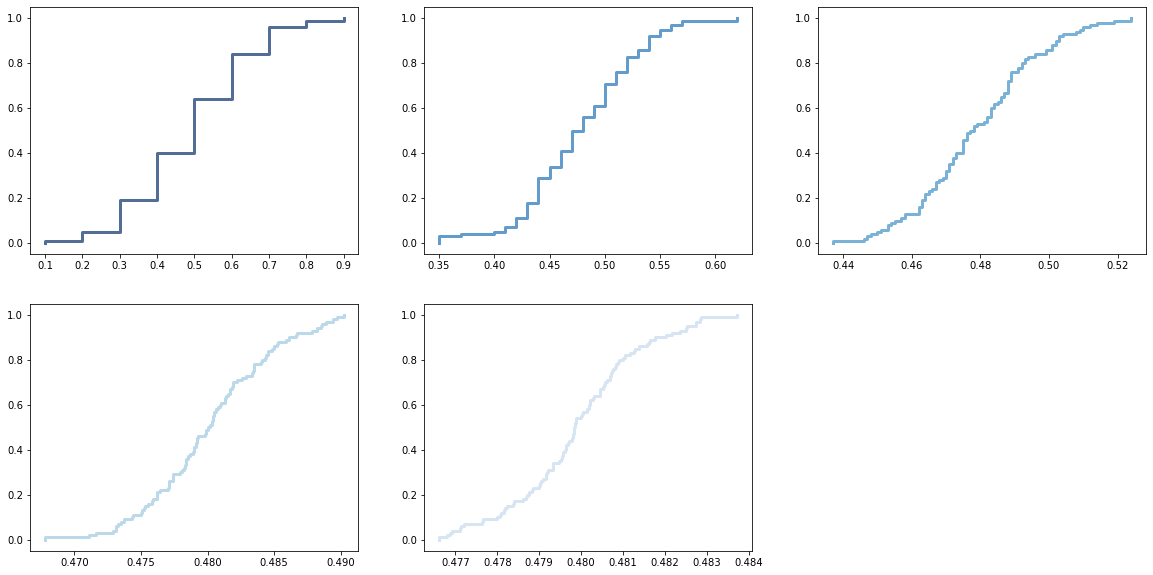

In [573]:
for i in range(countHist):
    tmpH2, err2, cdf2, ci2 = getSamples(probp2, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    thinkplot.Cdf(cdf)
    print("Error:", err2)
thinkplot.Config()


0.133


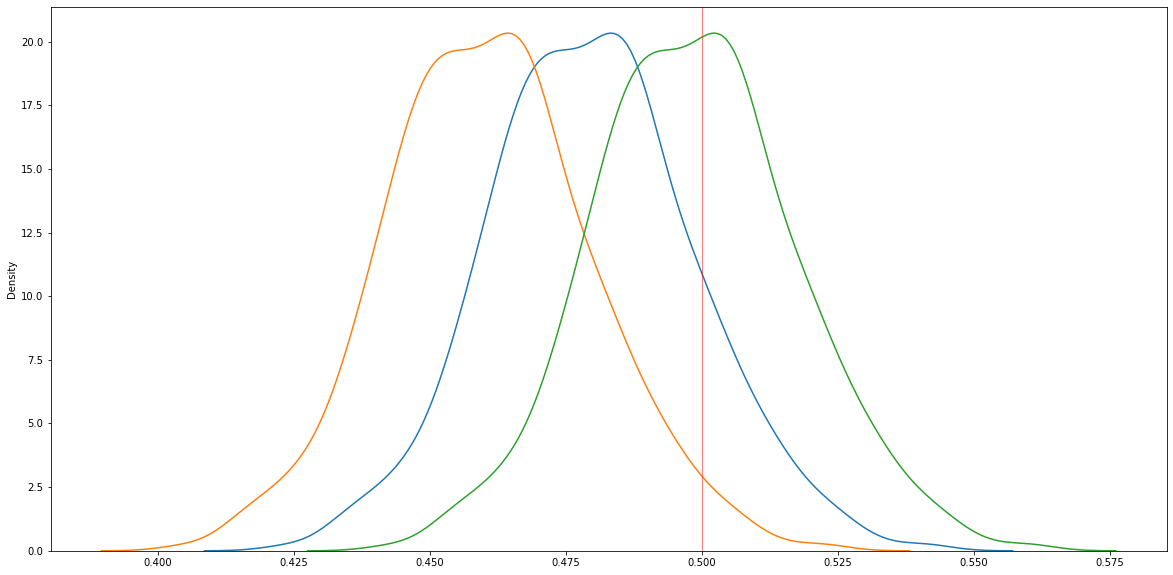

In [599]:
#Run a bunch of trials and count how many purple wins in. 
trials = 1000
means2, err2, cdfFin2, ciFin2 = getSamples(probp2, n=700, samples=trials)
lowest2 = means2 - err2
highest2 = means2 + err2
bWins2 = 0 
for i in range(len(means2)):
    if means2[i] > .5000:
        bWins2 = bWins2 + 1
print(bWins2/trials)

sns.kdeplot(means2)
sns.kdeplot(lowest2)
sns.kdeplot(highest2)
thinkplot.axvline(.5, color="red")


Predicting the winner is with all 9 polls combined in District 2

Fraction of Scenarios where purple wins is 13.5% 
We are 95 percent confident that purple will get between 44.0% and 51.7% percent of the vote


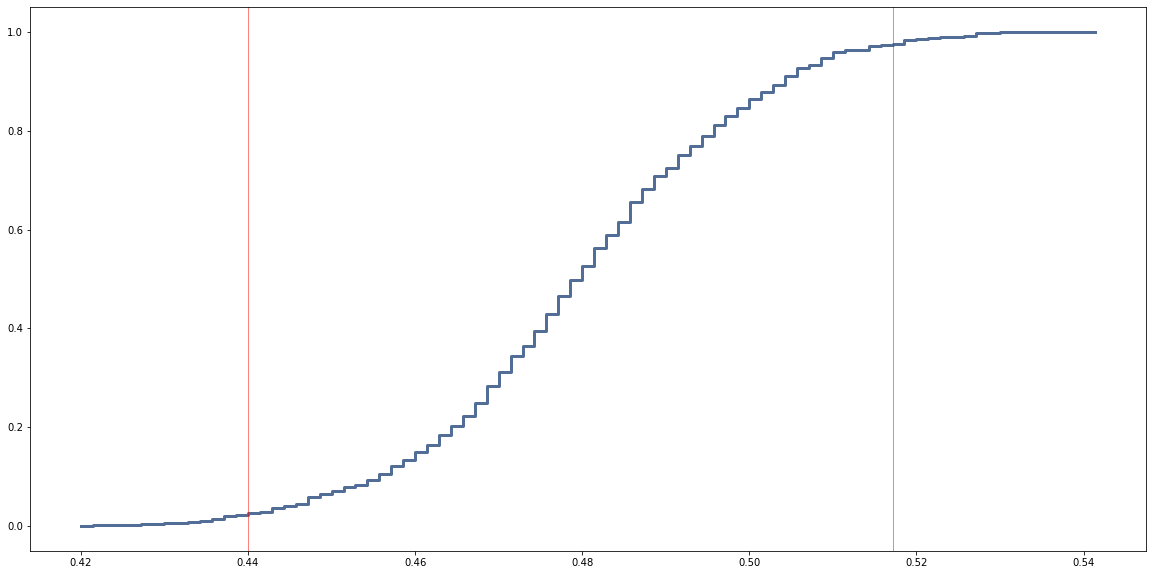

In [584]:
thinkplot.Cdf(cdfFin2)
thinkplot.axvline(ciFin2[0], color="red")
thinkplot.axvline(ciFin2[1], color="red")
print("Fraction of Scenarios where purple wins is %.1f%% " % ((1-cdfFin2.Prob(.50))*100))
print("We are 95 percent confident that purple will get between %.1f%% and %.1f%% percent of the vote" % (ciFin2[0]*100, ciFin2[1]*100))


Prediction- Purple party is loosing in District 2  
            Yellow party is winner is district 2    

                            DISTRICT-3

In [529]:
df3=dff.iloc[2]
print("Purple pary vote share in 9 polls in district 3  :",df3.mean())

Purple pary vote share in 9 polls in district 3  : 0.51


In [566]:
#How likely is it for someone to vote purple and yellow?
probp3 = .51
print("Purple Prob:", probp3)

proby3 = .49
print("Yellow Prob :", proby3)


Purple Prob: 0.51
Yellow Prob : 0.49


In [553]:
#proability of 1 vote going to purple party
oneVote(probp3)

1

In [579]:
#Get a bunch of votes, print the percentage that are purple. 
#Try changing n and see what happens. 
tmp2 = getSample(probp3, 6500)
np.mean(tmp2)


0.5170769230769231

In [578]:
def getSamples(voteProb, n=1000, samples=100, ciLow=2.5, ciHi=97.5):
    meanList = []
    for i in range(samples):
        meanList.append(np.mean(getSample(voteProb, n)))
    muList = [voteProb] * samples
    cdf = thinkstats2.Cdf(meanList) #Make a CDF of the means of the analytical dist's
    ci = cdf.Percentile(ciLow), cdf.Percentile(ciHi) #5th, 95th percentiles. 
    stderr = mean_squared_error(meanList, muList, squared=False)
    return meanList, stderr, cdf, ci


In [580]:
getSamples(probp3, 1100, 5)

([0.4954545454545455,
  0.5227272727272727,
  0.4827272727272727,
  0.49727272727272726,
  0.509090909090909],
 0.016001033024503127,
 Cdf([0.48272727 0.49545455 0.49727273 0.50909091 0.52272727], [0.2 0.4 0.6 0.8 1. ]),
 (0.4827272727272727, 0.5227272727272727))

Sample Size Check

Error: 0.16047089795632444
Error: 0.049007420588389194
Error: 0.01654904556434931
Error: 0.005144519590611141


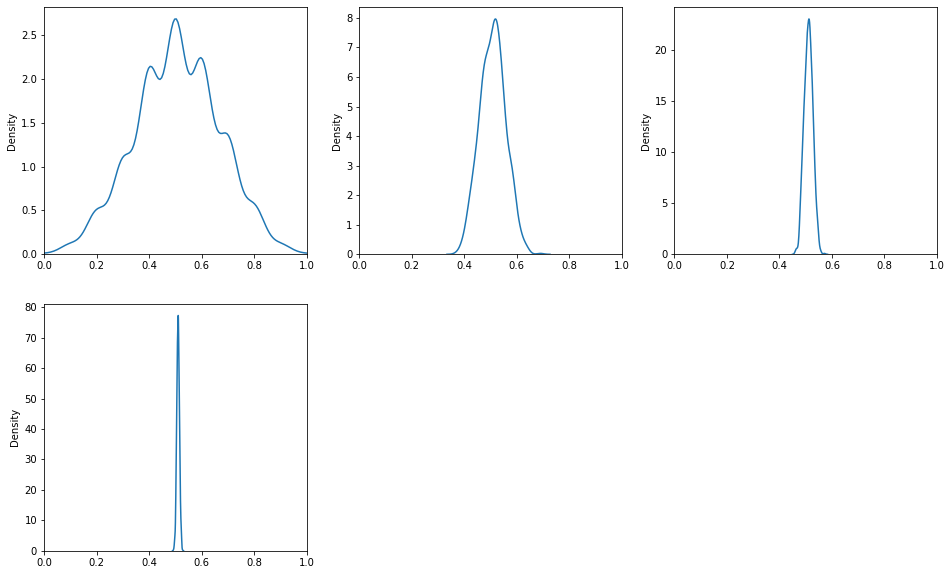

In [581]:
#Print a grid of differnet n values

countHist = 4
nVals = [10,100,1000,10000,100000,1000000]
thinkplot.PrePlot(6,rows=2,cols=3)
samples = 1100

for i in range(countHist):
    tmpH3, err3, cdf3, ci3 = getSamples(probp3, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    sns.kdeplot(tmpH3).set(xlim=(0,1))
    print("Error:", err3)
thinkplot.Config()


All of these graphs have a fixed x-axis, the "tigher" the projections (probability of a purple party win) are, the more confident we are in that prediction. Or, the more likely "that thing" is to happen, and the less likely some "far away thing" is to happen. 

Error: 0.15719703906533702
Error: 0.050304527177436574
Error: 0.015789783808756633
Error: 0.005184646038588803


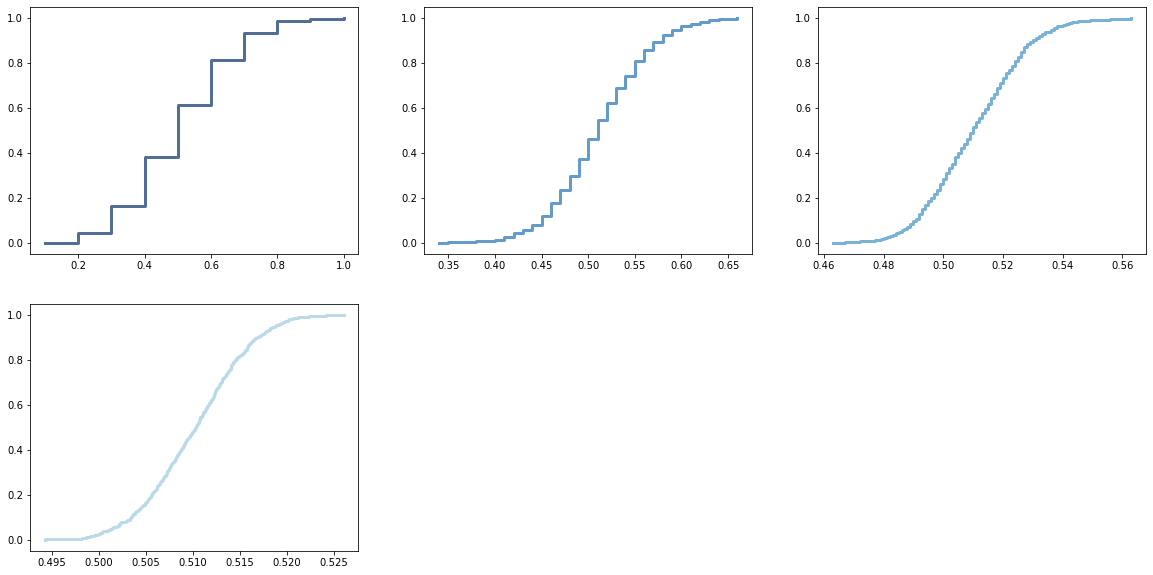

In [582]:
#plotting CDF's:
for i in range(countHist):
    tmpH3, err3, cdf3, ci3 = getSamples(probp3, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    thinkplot.Cdf(cdf3)
    print("Error:", err3)
thinkplot.Config()


Above are multiple executions, with multiple n values. What we should see is that as we get larger and larger n values - the number of 'surveys' taken, we should get closer and closer to a normal curve centered around the expected percentage of votes for purple party = 51.4%. 

0.6663636363636364


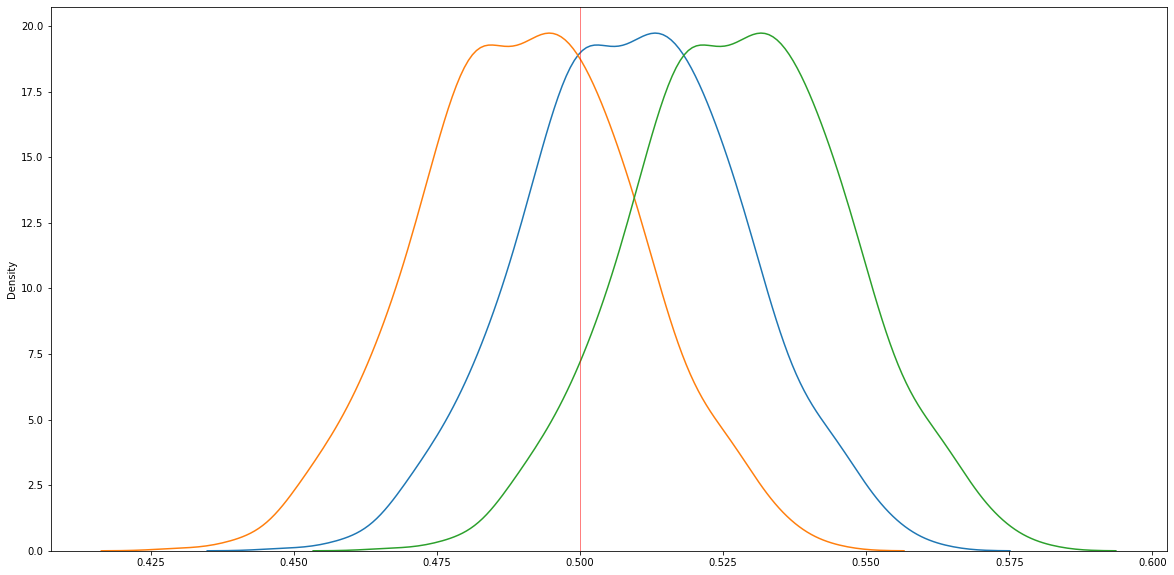

In [598]:
#Run a bunch of trials and count how many purple wins in. 
trials = 1100
means3, err3, cdfFin3, ciFin3 = getSamples(probp3, n=700, samples=trials)
lowest3 = means3 - err3
highest3 = means3 + err3
bWins3 = 0 
for i in range(len(means3)):
    if means3[i] > .5000:
        bWins3 = bWins3 + 1
print(bWins3/trials)

sns.kdeplot(means3)
sns.kdeplot(lowest3)
sns.kdeplot(highest3)
thinkplot.axvline(.5, color="red")


Predict The winner in all 9 polls in for District 2

Fraction of Scenarios where purple wins is 66.6% 
We are 95 percent confident that purple will get between 47.3% and 54.6% percent of the vote


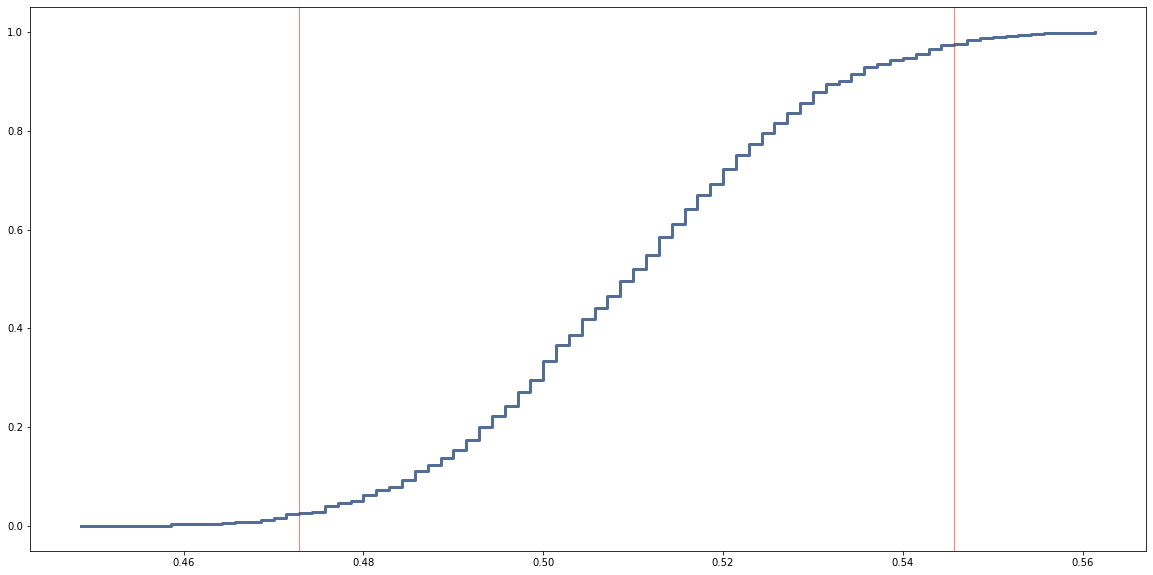

In [600]:
thinkplot.Cdf(cdfFin3)
thinkplot.axvline(ciFin3[0], color="red")
thinkplot.axvline(ciFin3[1], color="red")
print("Fraction of Scenarios where purple wins is %.1f%% " % ((1-cdfFin3.Prob(.50))*100))
print("We are 95 percent confident that purple will get between %.1f%% and %.1f%% percent of the vote" % (ciFin3[0]*100, ciFin3[1]*100))


Prediction-  District 3 -Winner-Purple Party

                                    DISTRICT-4

In [586]:
df4=dff.iloc[3]
print("Purple pary vote share in 9 polls in district 4  :",round(df4.mean(),2))

Purple pary vote share in 9 polls in district 4  : 0.6


In [601]:
#How likely is it for someone to vote purple and yellow?
probp4 = .60
print("Purple Prob:", probp4)

proby4 = .40
print("Yellow Prob :", proby4)


Purple Prob: 0.6
Yellow Prob : 0.4


In [602]:
oneVote(probp4)

1

In [604]:
#Get a bunch of votes, print the percentage that are purple. 
#Try changing n and see what happens. 
tmp4 = getSample(probp4, 1000)
np.mean(tmp4)


0.612

In [605]:
getSamples(probp4, 1000, 5)

([0.579, 0.618, 0.595, 0.608, 0.602],
 0.013099618315050264,
 Cdf([0.579 0.595 0.602 0.608 0.618], [0.2 0.4 0.6 0.8 1. ]),
 (0.579, 0.618))

Error: 0.15652475842498528
Error: 0.046840153714521486
Error: 0.014358969322343451
Error: 0.004790156573641406
Error: 0.001554117112704192


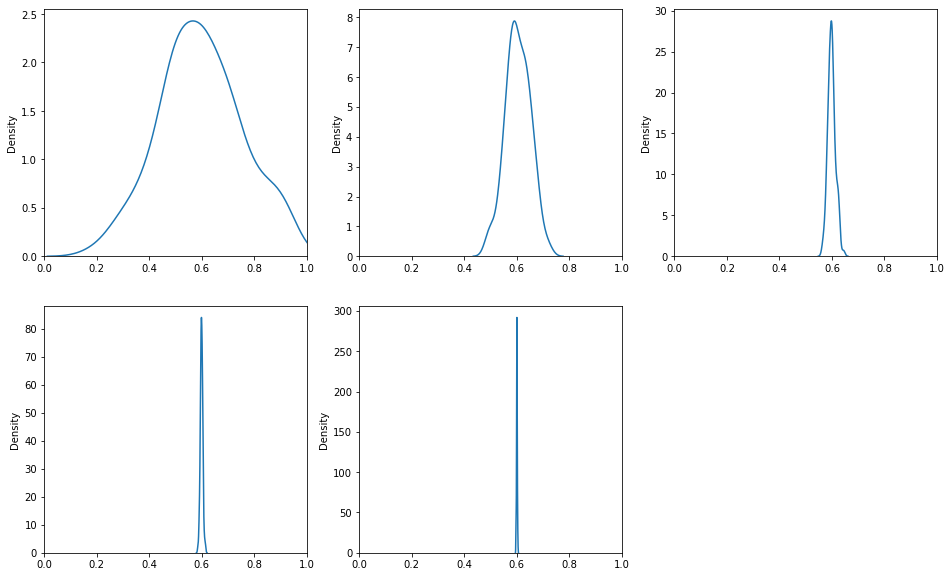

In [606]:
countHist = 5
nVals = [10,100,1000,10000,100000,1000000]
thinkplot.PrePlot(6,rows=2,cols=3)
samples = 100

for i in range(countHist):
    tmpH4, err4, cdf4, ci4 = getSamples(probp4, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    sns.kdeplot(tmpH4).set(xlim=(0,1))
    print("Error:", err4)
thinkplot.Config()


Error: 0.14628738838327793
Error: 0.04419275958796871
Error: 0.015126797413861285
Error: 0.0049604636880033704
Error: 0.0015984070195041097


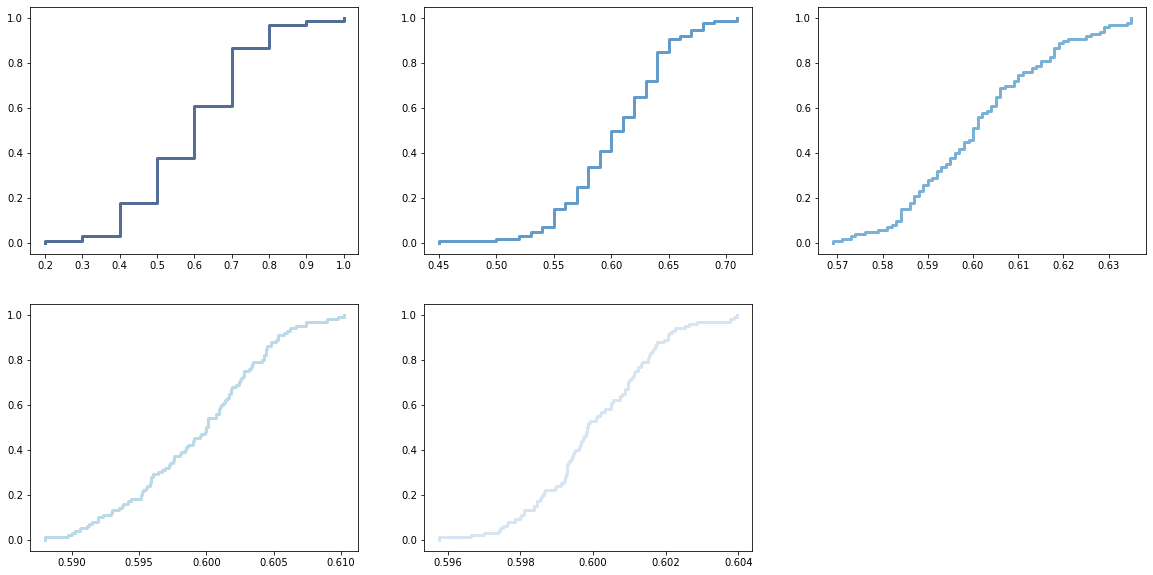

In [593]:
for i in range(countHist):
    tmpH4, err4, cdf4, ci4 = getSamples(probp4, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    thinkplot.Cdf(cdf4)
    print("Error:", err4)
thinkplot.Config()


1.0


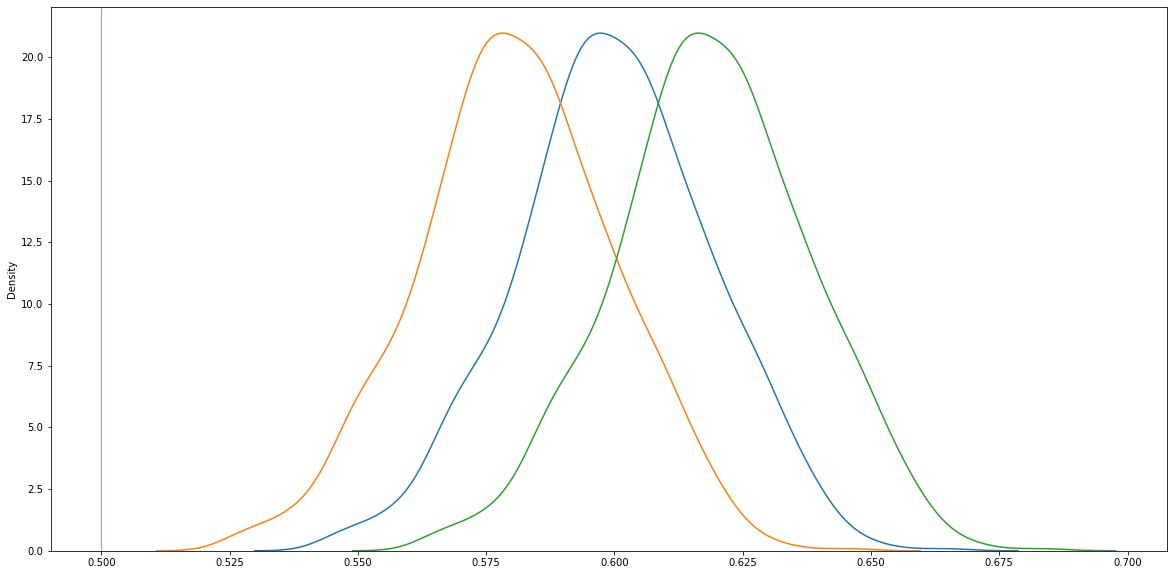

In [609]:
#Run a bunch of trials and count how many purple wins in. 
trials = 1000
means4, err4, cdfFin4, ciFin4 = getSamples(probp4, n=700, samples=trials)
lowest4 = means4 - err4
highest4 = means4 + err4
bWins4 = 0 
for i in range(len(means4)):
    if means4[i] > .5000:
        bWins4 = bWins4 + 1
print(bWins4/trials)

sns.kdeplot(means4)
sns.kdeplot(lowest4)
sns.kdeplot(highest4)
thinkplot.axvline(.5, color="red")


Fraction of Scenarios where purple wins is 100.0% 
We are 95 percent confident that purple will get between 56.1% and 63.7% percent of the vote


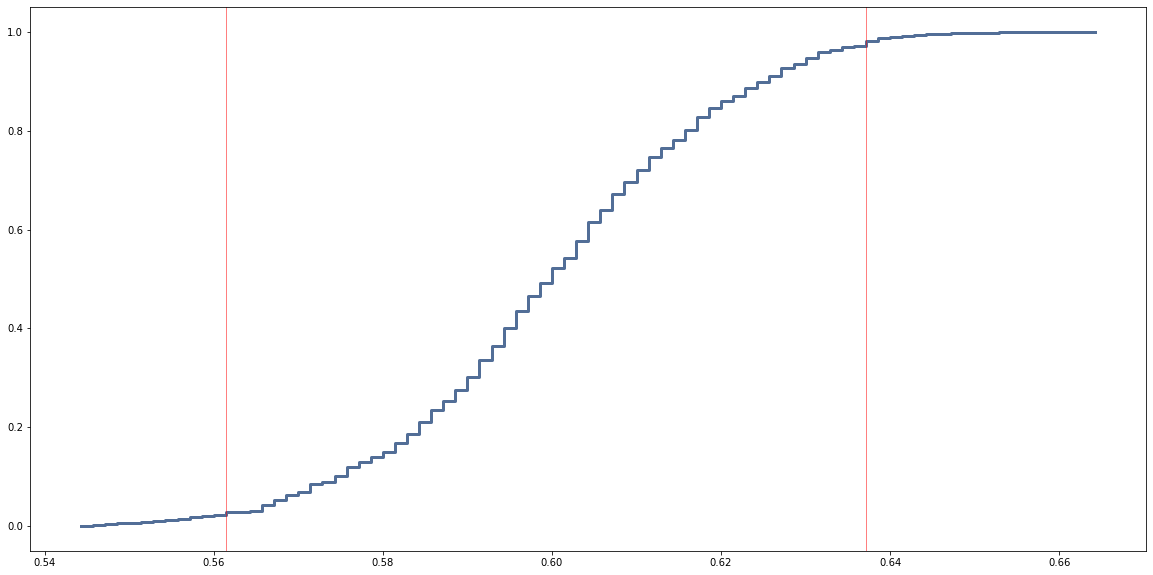

In [610]:
thinkplot.Cdf(cdfFin4)
thinkplot.axvline(ciFin4[0], color="red")
thinkplot.axvline(ciFin4[1], color="red")
print("Fraction of Scenarios where purple wins is %.1f%% " % ((1-cdfFin4.Prob(.50))*100))
print("We are 95 percent confident that purple will get between %.1f%% and %.1f%% percent of the vote" % (ciFin4[0]*100, ciFin4[1]*100))


Prediction - Combining all the 9 polls in district4 - winner is purple party

                                District-5

In [401]:
# calucating total yellow party vote share:

past_vote_table["Yellow_vote_expected"]=past_vote_table["voter_turn_percentage"]+past_vote_table["Yellow_improvement"]
past_vote_table

,voter_turn_percentage,Yellow_improvement,year,Yellow_vote_expected
0,0.53,0.012,2013,0.542
1,0.51,0.023,2014,0.533
2,0.48,-0.017,2015,0.463
3,0.55,0.031,2016,0.581
4,0.54,0.030,2017,0.570
5,0.59,-0.004,2018,0.586
6,0.49,-0.030,2019,0.460
7,0.57,0.042,2020,0.612
8,0.56,0.029,2021,0.589


In [402]:
purple_vote=['.458','.467','.537','.419','.43','.414','.54','.398','.411']
Yellow_vote=['.542','.5333','.463','.581','.57','.586','.46','.612','.589']

### Part 2 - Regression

<b>Use the data provided to try to predict the wage. </b>

The data is from FIFA rankings for players. You don't need to know anything about soccer or video games for this, so if these values are meaningless to you, just treat them as numbers and you'll be fine. All of the features are rankings are evaluations of how good different soccar players are at different skills.

#### Answer in English

Please fill in (and extend if required) the list here to explain what you did. There are multiple reasonable things you could do to approach this, so please note what you did here. For most people I assume this will be about 3-5 statements - you don't need to explain the internals of things we covered (e.g. if there's a hypothesis test, you don't need to explain how that works), just how you structured your approach to the problem. 

<ul>
<li>
<li>
<li>
</ul>

In [467]:
df = pd.read_csv("players_20_2.csv")
df.head()
df.dropna()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,565000,88,95,70,92,88,97,93,94,92,...,94,48,40,94,94,75,96,33,37,26
1,405000,84,94,89,83,87,89,81,76,77,...,93,63,29,95,82,85,95,28,32,24
2,290000,87,87,62,87,87,96,88,87,81,...,84,51,36,87,90,90,94,27,26,29
3,125000,13,11,15,43,13,12,13,14,40,...,12,34,19,11,65,11,68,27,12,18
4,470000,81,84,61,89,83,95,83,79,83,...,80,54,41,87,89,88,91,34,27,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,2000,21,17,40,35,27,24,23,21,28,...,16,46,48,28,25,39,41,45,50,52
18274,2000,24,20,42,43,28,32,24,29,39,...,20,42,49,23,25,37,35,42,53,57
18275,1000,32,33,49,53,32,40,32,32,55,...,26,50,45,38,38,36,39,46,52,46
18276,1000,39,34,47,54,28,42,37,39,48,...,28,57,49,31,48,36,40,39,44,54


In [404]:
df.shape

(18278, 30)

In [ ]:
#'movement_reactions', 'mentality_composure', 'mentality_vision','attacking_short_passing'

In [468]:
df.describe()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,9456.942773,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,...,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631
std,21351.714095,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,...,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734
min,0.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000
25%,1000.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,...,32.000000,44.000000,25.000000,39.000000,44.000000,39.000000,51.000000,29.000000,27.000000,24.000000
50%,3000.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,...,51.000000,58.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.000000,55.000000,52.000000
75%,8000.000000,64.000000,62.000000,64.000000,68.000000,56.000000,68.000000,62.000000,56.000000,64.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,565000.000000,93.000000,95.000000,93.000000,92.000000,90.000000,97.000000,94.000000,94.000000,92.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,92.000000,90.000000


In [486]:
df=df[df["wage_eur"]<100000]
df=df[df["wage_eur"]>20000]
df=df[df["movement_reactions"]>30]
df=df[df["mentality_composure"]>50]
df=df[df["mentality_vision"]>50]
df=df[df["attacking_short_passing"]>60]




In [487]:
df.shape

(1578, 30)

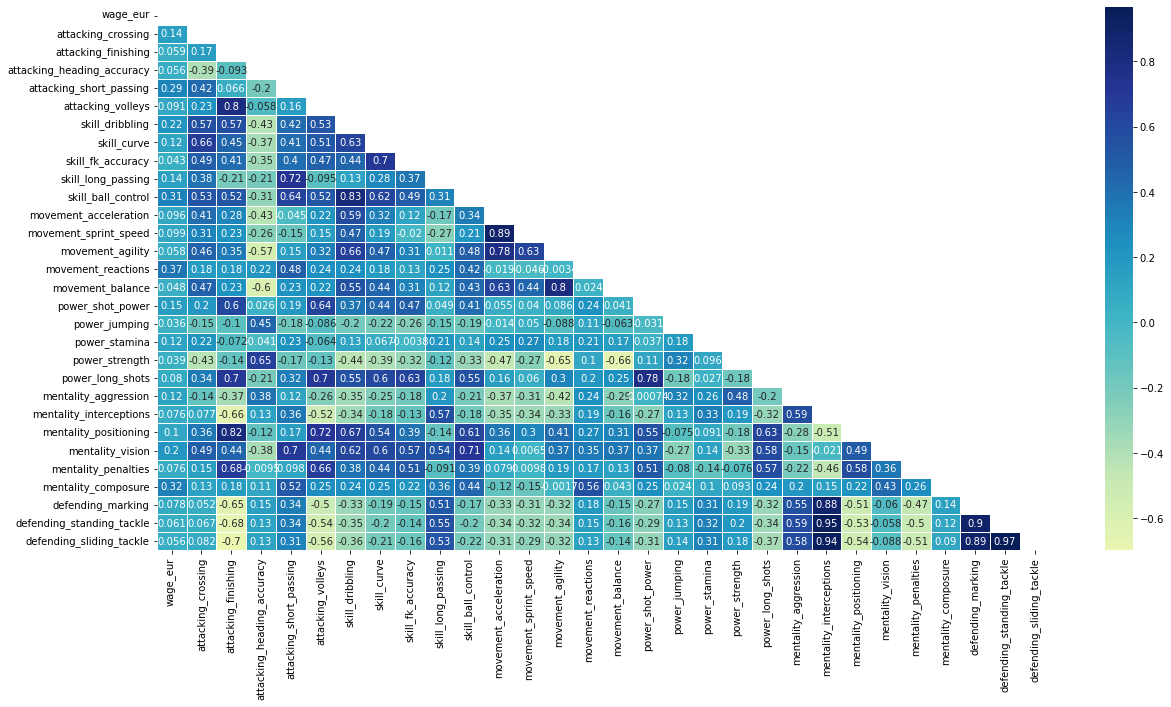

In [488]:
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

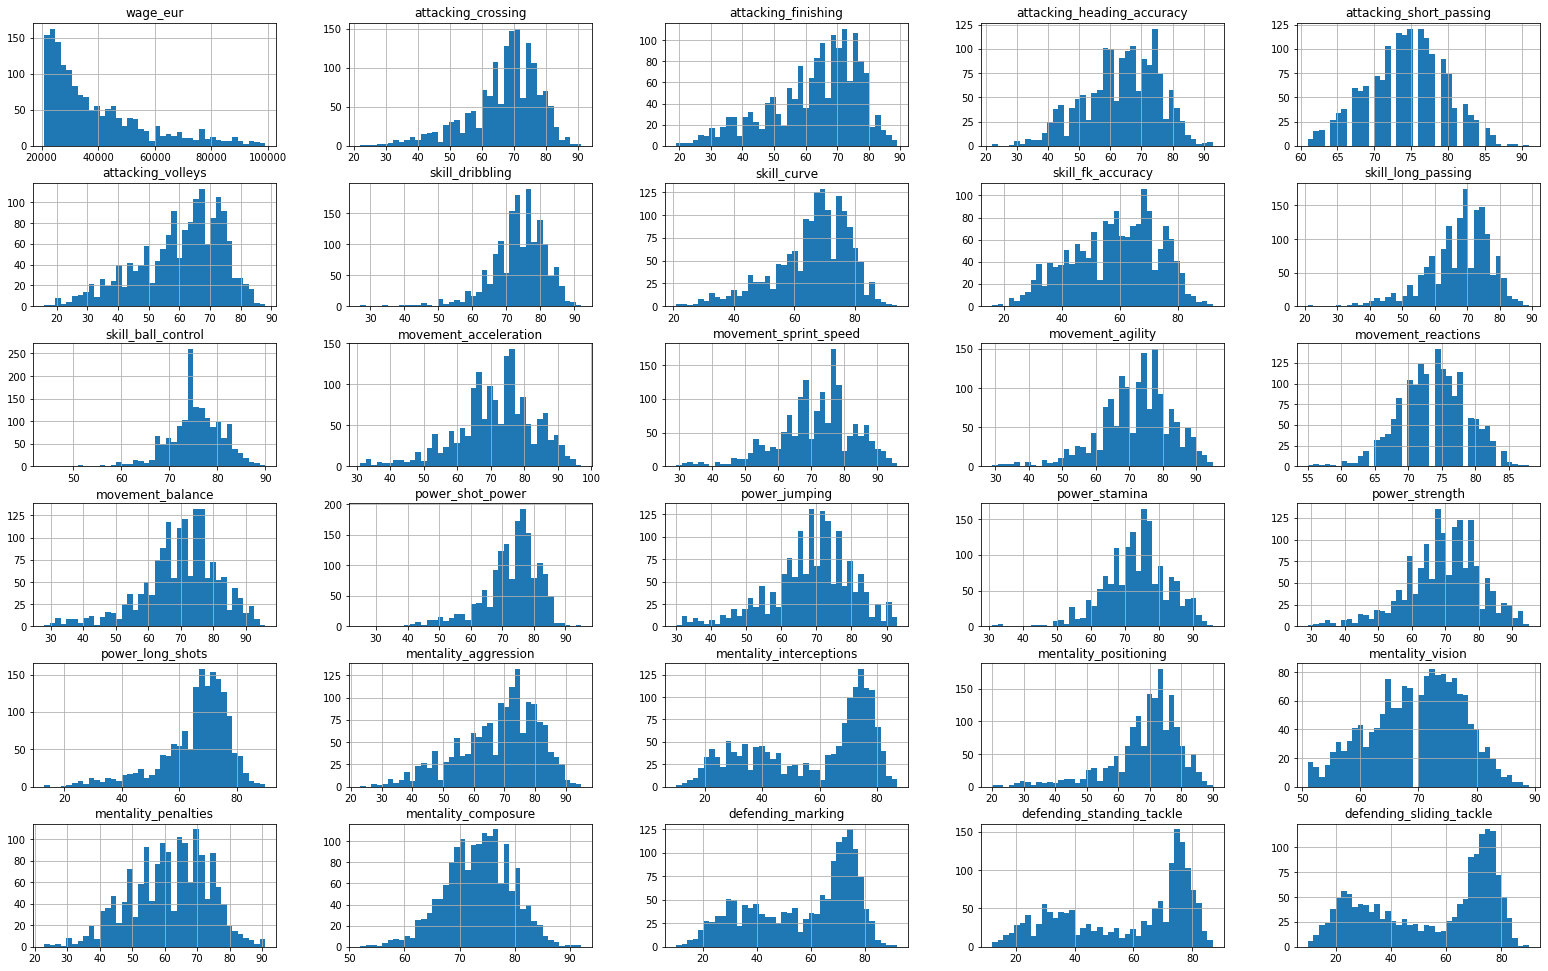

In [489]:
df.hist(bins=40, figsize=(27,17))
plt.show()

In [464]:
df.head(1)

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
57,89000,40,42,82,73,40,67,34,30,69,...,30,86,86,30,57,56,81,92,87,83


Values 'movement_reactions', 'mentality_composure', 'mentality_vision','attacking_short_passing' have high 
correlation with the wages therfore  choosing these as x values

In [490]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [491]:
# seperate out our x and y values
x_values = df[[ 'movement_reactions', 'mentality_composure', 'mentality_vision','attacking_short_passing' ]].values
y_values = df['wage_eur'].values

# visual
print(x_values[0], y_values[0])

[83 81 57 73] 89000


In [492]:
x_values

array([[83, 81, 57, 73],
       [78, 85, 86, 91],
       [83, 82, 63, 76],
       ...,
       [56, 57, 61, 63],
       [59, 58, 55, 64],
       [62, 68, 70, 69]], dtype=int64)

In [494]:
degree=2


poly_model = PolynomialFeatures(degree=degree)


poly_x_values = poly_model.fit_transform(x_values)


print(f'initial values {x_values[0]}\nMapped to {poly_x_values[0]}')

initial values [83 81 57 73]
Mapped to [1.000e+00 8.300e+01 8.100e+01 5.700e+01 7.300e+01 6.889e+03 6.723e+03
 4.731e+03 6.059e+03 6.561e+03 4.617e+03 5.913e+03 3.249e+03 4.161e+03
 5.329e+03]


In [495]:
poly_model.fit(poly_x_values, y_values)


regression_model = LinearRegression()

regression_model.fit(poly_x_values, y_values)

y_pred = regression_model.predict(poly_x_values)

regression_model.coef_

mean_squared_error(y_values, y_pred, squared=False)

16137.949477897142

In [497]:
y = np.array(df["wage_eur"]).reshape(-1,1)
y.shape

(1578, 1)

In [498]:
#Get a new df with only the features we'll use
df_ = df.drop(columns={"wage_eur"})


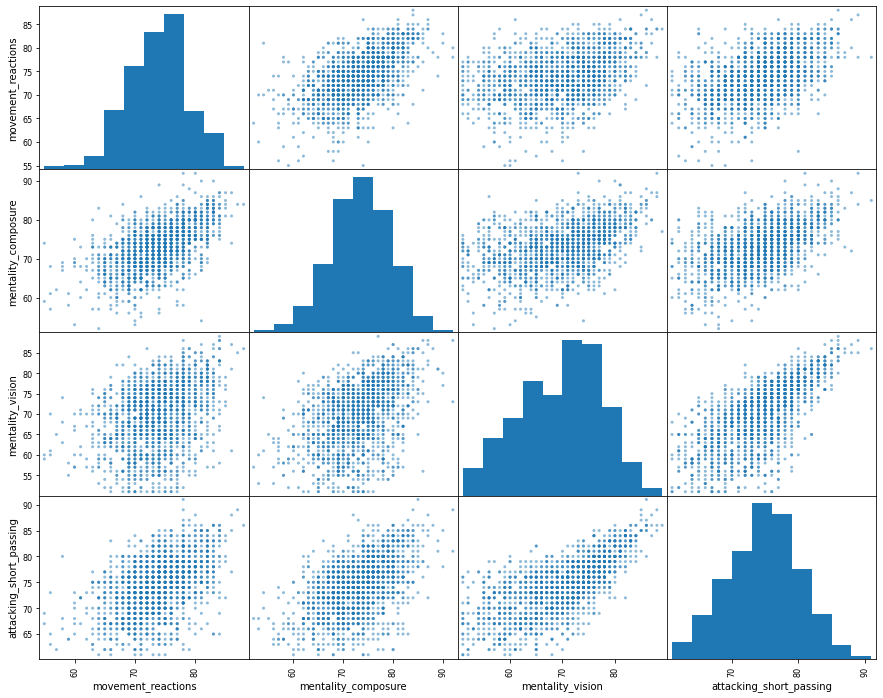

In [499]:
#plotting the scatter plot for Independent variables:
from pandas.plotting import scatter_matrix
attributes = [ 'movement_reactions', 'mentality_composure', 'mentality_vision','attacking_short_passing']
scatter_matrix(df_[attributes], figsize=(15,12))
plt.show()

We expected this as all the above are showing high collinearity

In [501]:
df_ = df_[[ 'movement_reactions', 'mentality_composure', 'mentality_vision','attacking_short_passing']]

In [502]:
x = np.array(df_)
x.shape

(1578, 4)

In [503]:
#Split data
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=.3)

In [504]:
#Generate model 
model = LinearRegression().fit(xTrain,yTrain)

In [505]:
r_sq = model.score(xTest, yTest)
print('R-squared:', r_sq)

R-squared: 0.1772436485353457


In [506]:
print('Intercept:', model.intercept_[0])
print('Coefs:', model.coef_[0])

Intercept: -72766.12831184792
Coefs: [ 826.7213876   395.14200998 -115.70678492  410.7236643 ]


In [507]:
#Setup
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection
from sklearn.model_selection import train_test_split

In [510]:
#Get RMSE
tmp = model.predict(xTest)
R_mse=mean_squared_error(tmp, yTest, squared=False)
r_sqr=model.score(xTest,yTest)
print("RMSE:", R_mse)
print('R-squared:', r_sqr)

RMSE: 16707.619973155764
R-squared: 0.1772436485353457


In [519]:
y_pred=model.predict(xTest)

PREDICTIONS

In [522]:
y_pred[0]

array([34308.9458768])

In [523]:
yTest[0]

array([28000], dtype=int64)

In [431]:

w = "wage_eur"
c = "movement_reactions"
hw = df[['wage_eur', "movement_reactions"]]
hw = hw.dropna(axis=0)
hw = hw.dropna(axis=1)

<AxesSubplot:xlabel='wage_eur', ylabel='movement_reactions'>

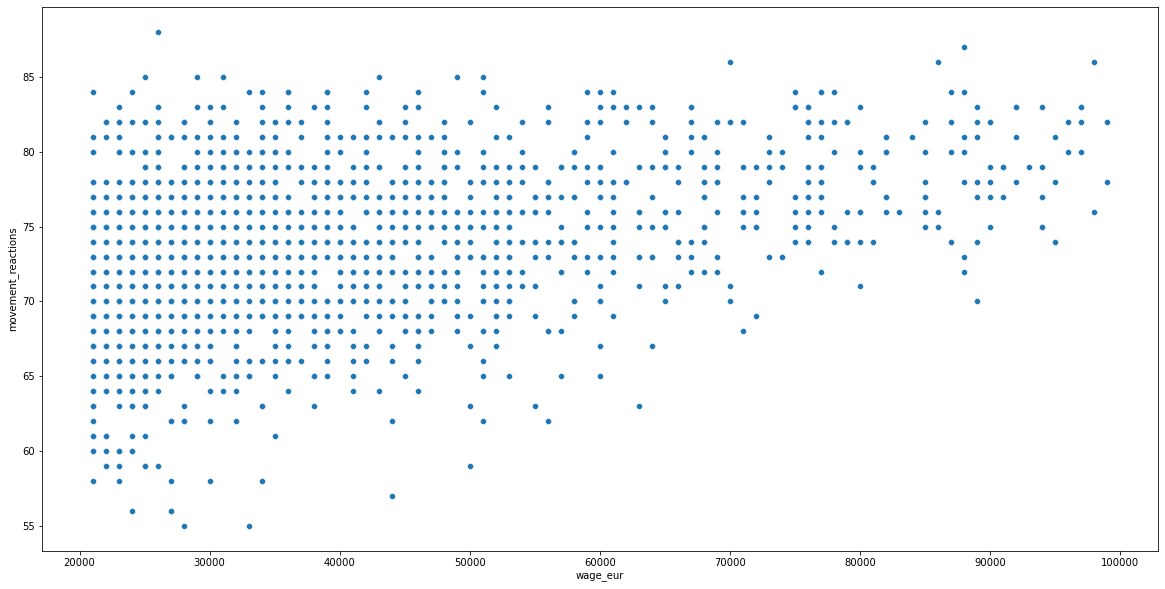

In [434]:
sns.scatterplot(data=hw, x=hw[w], y=hw[c])

In [435]:
#Do regression
inter, slope = thinkstats2.LeastSquares(hw[w], hw[c]) # Calculate model
res = thinkstats2.Residuals(hw[w], hw[c], inter, slope) # Make residual list. Used later, not needed now. 
regLine = thinkstats2.FitLine(hw[w], inter, slope) # Generate line for plotting. 
print("Y intercept:", inter)
print("Slope:", slope)


Y intercept: 68.94861149707548
Slope: 0.00011520230283338024


In [436]:
print(" Prediction:")
(slope*92)+inter

 Prediction:


68.95921010893615

In [437]:
#Deal with data
#ensure that the inputs and outputs are the right shape.
#The -1 means basically "make it one column" in this use. 
x = np.array(hw[w]).reshape(-1,1)
y = np.array(hw[c]).reshape(-1,1)
x.shape, y.shape

((1941, 1), (1941, 1))

In [438]:
#generate Model
model = LinearRegression().fit(x, y) 

In [439]:
#Get the results of generating the model

#Note: some results come wrapped in an array, that's what the [0]s are for. Remove them to see the true return. 
# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = model.score(x, y)

print('Coefficient of determination (more on this later):', r_sq)
#Print the Intercept:
print('Intercept:', model.intercept_[0])
# Print the Slope:
print('Slope:', model.coef_[0][0]) 

Coefficient of determination (more on this later): 0.15225970541898404
Intercept: 68.94861149707548
Slope: 0.00011520230283338024


<AxesSubplot:xlabel='X', ylabel='Y'>

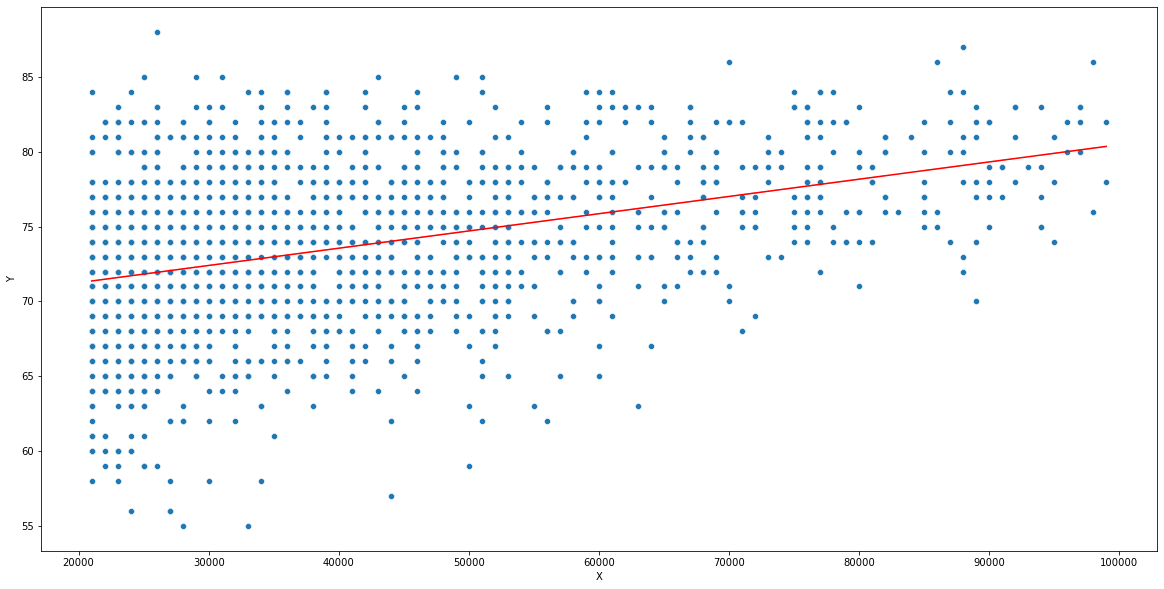

In [440]:
#I'll make a df for ease of use. 
dat = pd.DataFrame(data=np.column_stack((x,y)),columns=['X','Y'])
sns.scatterplot(data=dat, x="X", y="Y")

#Generate the line
inter = model.intercept_[0]
slo = model.coef_[0][0]
inter, slo
lineInf = thinkstats2.FitLine(dat["X"], inter, slo)
sns.lineplot(x=lineInf[0], y=lineInf[1], color="red")

<AxesSubplot:xlabel='X', ylabel='Y'>

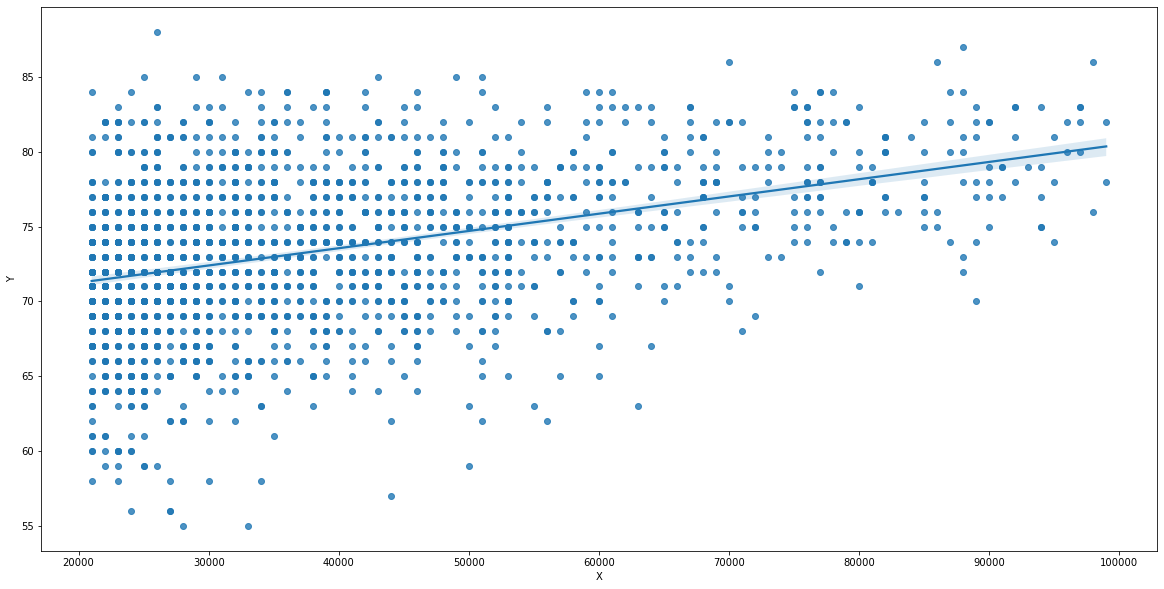

In [441]:
sns.regplot(data=dat, x="X", y="Y")

<AxesSubplot:xlabel='wage_eur', ylabel='movement_reactions'>

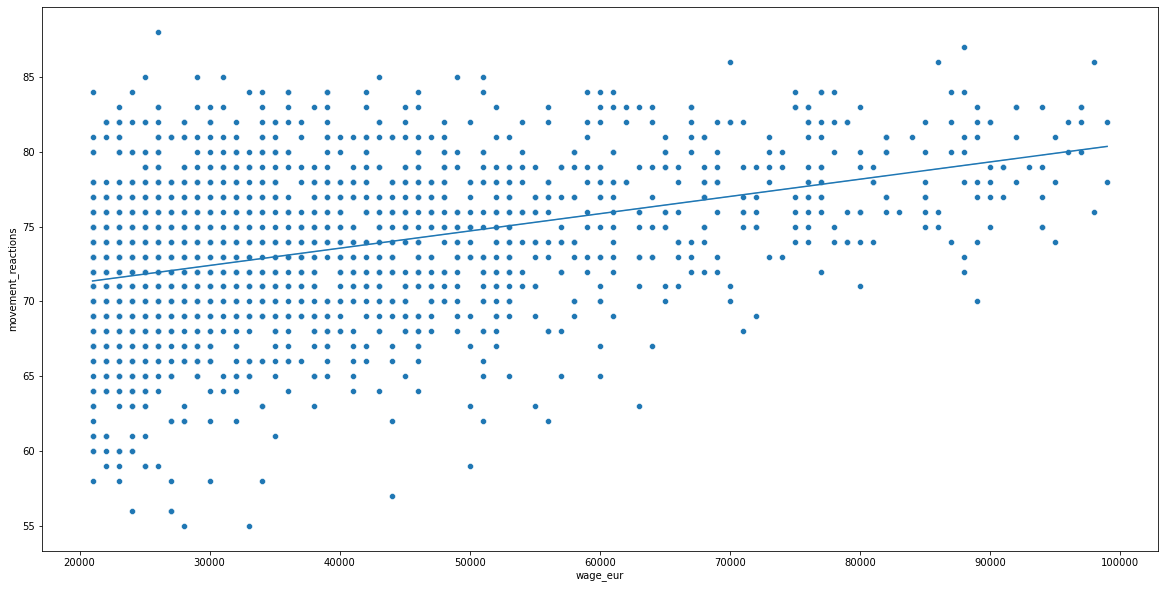

In [442]:
#Graph it.
#The fitline above calculates the line for us. For an exercise, try to implement a copy of that...
sns.scatterplot(x=hw[w], y=hw[c])
sns.lineplot(x=regLine[0], y=regLine[1])

In [516]:
print("A skill_curve 93 than the person is expected to be have wages:", slope*93 + inter, "euros")


A skill_curve 93 than the person is expected to be have wages: 68.95932531123898 euros


In [444]:
#Plot residuals directly
#sns.scatterplot(x=hw[w], y=res)
#plt.axhline(0, color="red")

In [445]:
#Seaborn also has a built in residual plot. 
#sns.residplot(x=hw[w], y=hw[c])

In [446]:
# Import library for VIF
#from statsmodels.stats.outliers_influence import variance_inflation_factor

#Function will check the VIF of each variable in a DF and return the results in another DF
#def calc_vif(X):
    # Calculating VIF
 #   vif = pd.DataFrame()
  #  vif["variables"] = X.columns
   # vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   # return(vif)

In [447]:
#df.head(1)

In [448]:
#df_ = df.drop(columns={"wage_eur"})
#df_.head()

In [449]:
#Check VIFs
#calc_vif(df_)

In [450]:
#new_df.corr()

In [451]:
#calc_vif(new_df)

In [526]:
A = df.iloc[:, 1:2].values.reshape(-1,1)
B = df.iloc[:, 2].values.reshape(-1,1)

In [527]:
from sklearn.model_selection import train_test_split 
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=0)

In [528]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(A, B)

LinearRegression()

In [524]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
A_poly = poly_reg.fit_transform(A)
pol_reg = LinearRegression()
pol_reg.fit(A_poly, B)

LinearRegression()

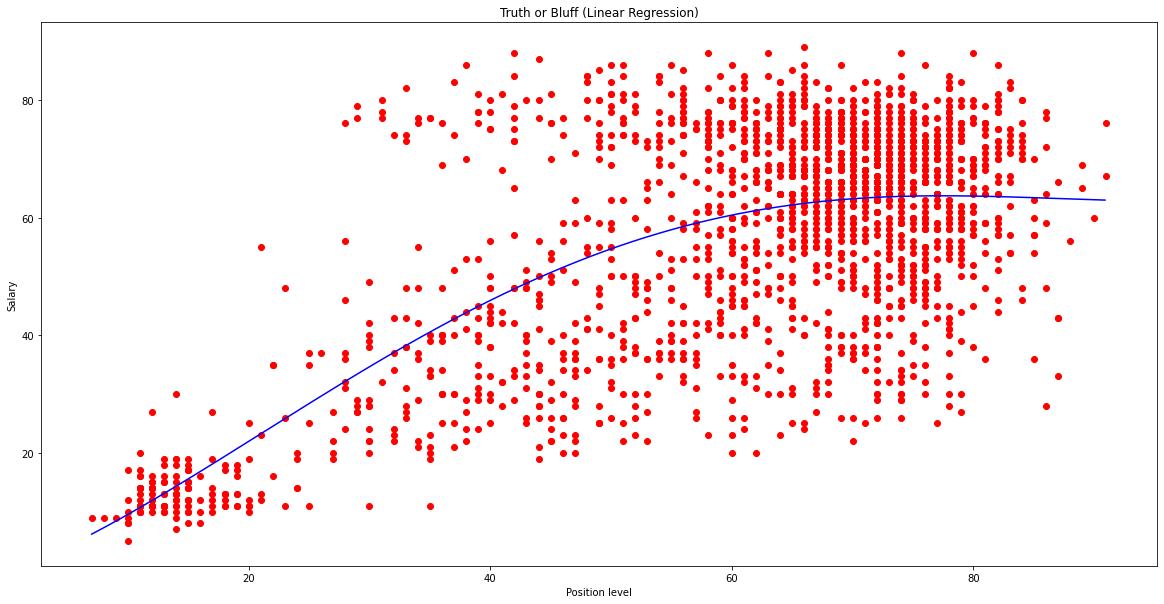

In [525]:
def viz_polymonial_smooth():
    A_grid = np.arange(min(A), max(A), 0.1)
    A_grid = A_grid.reshape(len(A_grid), 1) #reshape
    # Visualizing the Polymonial Regression results
    plt.scatter(A, B, color='red')
    plt.plot(A_grid, pol_reg.predict(poly_reg.fit_transform(A_grid)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial_smooth()